# K-Nearest Neighbours

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
biopsy_df = pd.read_csv('biospy/biopsy.csv')
biopsy_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X = biopsy_df.drop(['id', 'diagnosis'], axis=1)
y = biopsy_df['diagnosis']
y = y.replace('M', 1)
y = y.replace('B', 0)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
from sklearn.metrics import f1_score

y_pred = knn.predict(X_test)

accuracy = f1_score(y_test, y_pred)
print("F1:", accuracy)

F1: 0.9302325581395349


# K-Means Clustering

---

In [7]:
from sklearn.preprocessing import normalize

# Split the data
X = biopsy_df.drop(['id', 'diagnosis'], axis=1)

y = biopsy_df['diagnosis']
y = y.replace("M", 1)
y = y.replace("B", 0)

In [8]:
from sklearn.cluster import KMeans

X_norm = normalize(X)
kmeans = KMeans(
    n_clusters = 2, 
    init='k-means++'
)

kmeans.fit(X)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [9]:
from sklearn.metrics import f1_score

print("Non-inverted F1:", 
f1_score(y, kmeans.labels_))

print("Inverted F1:", 
f1_score(y, [0 if i == 1 else 1 for i in kmeans.labels_]))

Non-inverted F1: 0.7580174927113702
Inverted F1: 0.25230769230769234


# MLP

---

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(random_state=2, max_iter=300)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=2)

In [11]:
predictions = mlp.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9736842105263158


In [12]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def repetitions():
    increasing = []
    for i in range(1,101):
        mlp = MLPClassifier(random_state=2, max_iter=i)
        mlp.fit(X_train, y_train)

        predictions = mlp.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)

        increasing.append((i,accuracy))

    return increasing

increasing = repetitions()

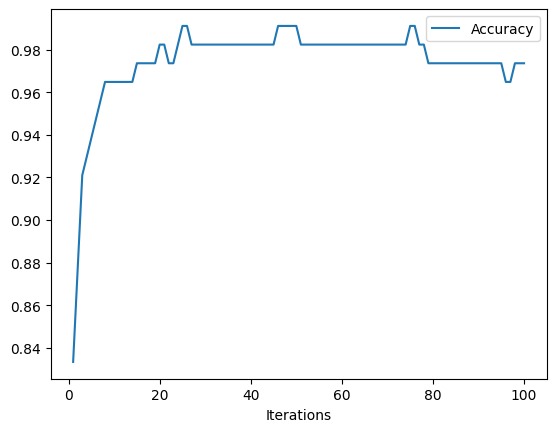

In [13]:
increasing = pd.DataFrame(increasing, columns=['Iterations', 'Accuracy'])
increasing.plot.line(x='Iterations', y='Accuracy')
plt.show()

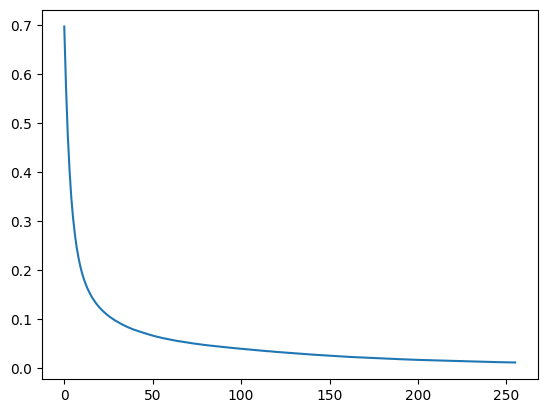

In [14]:
plt.plot(range(0, mlp.n_iter_), mlp.loss_curve_)
plt.show()

# SVM

---

In [15]:
from sklearn import svm

sv = svm.SVC(C=10, gamma=0.01, kernel="rbf")
sv.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [16]:
y_pred = sv.predict(X_test)
f1_score(y_test, y_pred)

0.9761904761904763

In [ ]:
from sklearn.manifold import TSNE

TSNE = TSNE(n_components = 2, random_state=21)

X_train_subset = X_train[:250]
y_train_subset = y_train[:250]
X_tsne = TSNE.fit_transform(X_train_subset)

X_tsne
# Notice that the length of arrays fell from 64 to 2

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_subset, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Biopsy Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()  